# 2.Clasification

Import important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
#model selection
from sklearn.model_selection import train_test_split

#classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

#Experiment with deeplearning eh multi layer JST
import tensorflow as tf
from tensorflow import keras

sns.set()
%matplotlib inline
classifier = 'svm'
postfix = '_heatmap'

### Import datasets

In [2]:
df = pd.read_csv('data/main_dataset_labeled.csv')
y = df['best_pos']
X = df.drop(['best_pos'], axis=1)
d = joblib.load('data/label_encoder_model.sav')
print(X.shape, y.shape)

(18278, 57) (18278,)


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5, 36.5, 38.5, 40.5, 42.5,
        44.5, 46.5, 48.5, 50.5, 52.5, 54.5, 56.5]),
 <a list of 29 Text yticklabel objects>)

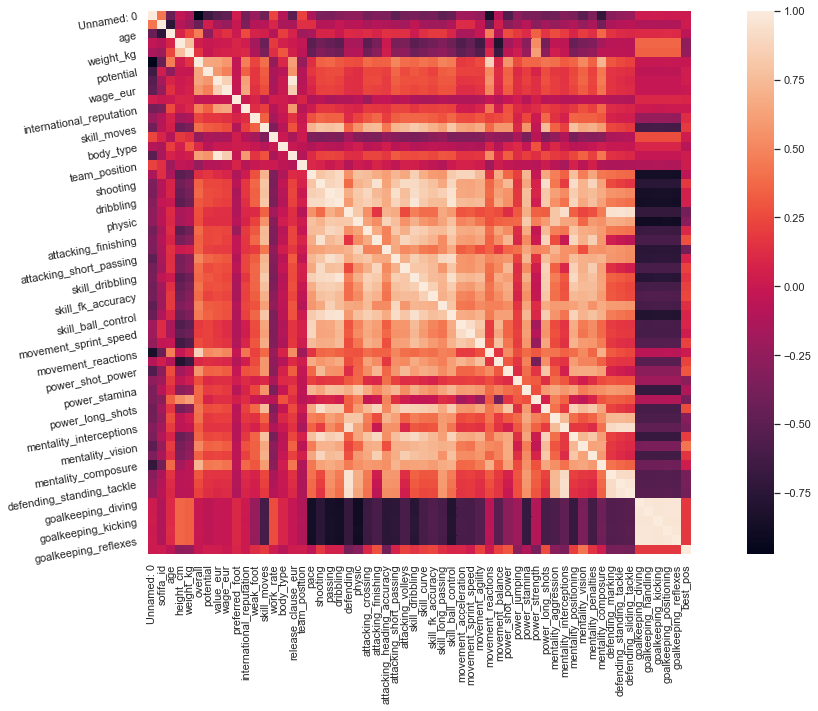

In [3]:
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
plt.figure(figsize=(20, 10))
ax = sns.heatmap(corr, vmax=1, square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=10)

Nice, let's build a dataframe using "Heatmap correlation" feature

In [4]:
corr['best_pos']

Unnamed: 0                    0.007697
sofifa_id                     0.019835
age                          -0.056302
height_cm                    -0.263639
weight_kg                    -0.238187
overall                      -0.010200
potential                     0.029686
value_eur                     0.029021
wage_eur                      0.002623
preferred_foot                0.085057
international_reputation      0.007766
weak_foot                     0.128539
skill_moves                   0.186817
work_rate                     0.021568
body_type                    -0.084573
release_clause_eur            0.024277
team_position                 0.021306
pace                         -0.058649
shooting                      0.176211
passing                       0.057472
dribbling                     0.054566
defending                    -0.383152
physic                       -0.297758
attacking_crossing            0.100759
attacking_finishing           0.281174
attacking_heading_accurac

In [5]:
corr['best_pos'].loc[corr['best_pos']>0.1].keys() #select feature with corelation more than 0.1 with best_pos

Index(['weak_foot', 'skill_moves', 'shooting', 'attacking_crossing',
       'attacking_finishing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'movement_agility', 'movement_balance', 'power_shot_power',
       'power_long_shots', 'mentality_positioning', 'mentality_vision',
       'mentality_penalties', 'goalkeeping_diving', 'goalkeeping_handling',
       'goalkeeping_kicking', 'goalkeeping_positioning',
       'goalkeeping_reflexes', 'best_pos'],
      dtype='object')

In [6]:
feature = ['weak_foot', 'skill_moves', 'shooting', 'attacking_crossing',
       'attacking_finishing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'movement_agility', 'movement_balance', 'power_shot_power',
       'power_long_shots', 'mentality_positioning', 'mentality_vision',
       'mentality_penalties', 'goalkeeping_diving', 'goalkeeping_handling',
       'goalkeeping_kicking', 'goalkeeping_positioning',
       'goalkeeping_reflexes',
        'potential', 'overall', 'pace', 'passing', 'dribbling', 'defending', 'physic'] #combine with my previous feature
X = X[feature]
X.head()

,weak_foot,skill_moves,shooting,attacking_crossing,attacking_finishing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,potential,overall,pace,passing,dribbling,defending,physic
0,4,4,92.0,88,95,88,97,93,94,92,...,15,14,8,94,94,87.0,92.0,96.0,39.0,66.0
1,4,5,93.0,84,94,87,89,81,76,77,...,15,14,11,93,93,90.0,82.0,89.0,35.0,78.0
2,5,5,85.0,87,87,87,96,88,87,81,...,15,15,11,92,92,91.0,87.0,95.0,32.0,58.0
3,3,1,0.0,13,11,13,12,13,14,40,...,78,90,89,93,91,0.0,0.0,0.0,0.0,0.0
4,4,4,83.0,81,84,83,95,83,79,83,...,6,8,8,91,91,91.0,86.0,94.0,35.0,66.0


## Clasify

In [7]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10101)

In [8]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
result = clf.predict(X_test)

In [10]:
classes = d['best_pos'].classes_
print(*zip(range(8),classes),sep='\n')

(0, 'Back_Centre')
(1, 'Back_Side')
(2, 'Back_Winger')
(3, 'Fwd_Centre')
(4, 'Fwd_Winger')
(5, 'Goal_Keeper')
(6, 'Mid_Centre')
(7, 'Mid_Side')


In [11]:
d['best_pos'].inverse_transform([6])

array(['Mid_Centre'], dtype=object)

In [12]:
result = pd.DataFrame(result)
result_inverse = d['best_pos'].inverse_transform(np.ravel(result))

In [13]:
clf.score(X_test,y_test)*100

82.582056892779

In [14]:
report = classification_report(y_test, result, zero_division=True, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.to_csv('output/'+ classifier + postfix +'.csv')

In [15]:
df_report

,precision,recall,f1-score,support
0,0.926569,0.839178,0.880711,827.000000
1,0.787836,0.889776,0.835709,626.000000
2,1.000000,0.000000,0.000000,34.000000
3,0.865607,0.903469,0.884133,663.000000
4,1.000000,0.000000,0.000000,197.000000
5,1.000000,1.000000,1.000000,494.000000
6,0.820233,0.875415,0.846926,1204.000000
7,0.584759,0.716190,0.643836,525.000000
accuracy,0.825821,0.825821,0.825821,0.825821
macro avg,0.873126,0.653004,0.636414,4570.000000


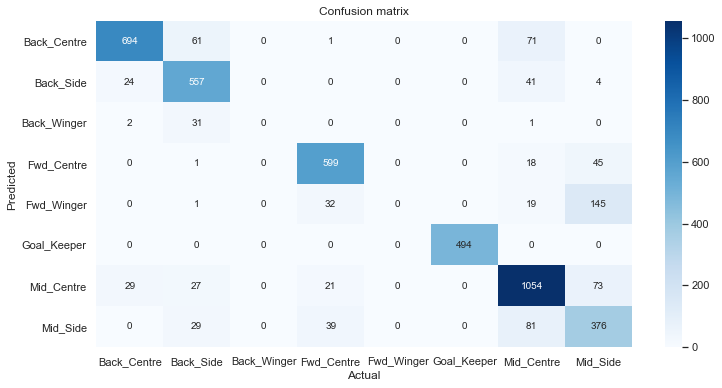

In [16]:
conf_matrix = confusion_matrix(y_test, result)
plt.figure(figsize=(12,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=classes, 
            yticklabels=classes,
            cmap="Blues",
            fmt='d')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [17]:
#save model
joblib.dump(clf,'model/'+ classifier + postfix +'.sav')

['model/svm_heatmap.sav']

## Cross validation score using K-fold

In [18]:
from sklearn.model_selection import cross_validate

In [19]:
cv_result = cross_validate(clf, X_train, y_train, cv=5, scoring=['f1_micro', 'f1_macro', 'f1_weighted', 'accuracy'],return_estimator = True)

In [20]:
cv_result

{'fit_time': array([1.67048192, 1.67555261, 1.67452312, 1.66551328, 1.68150449]),
 'score_time': array([0.52958417, 0.54351306, 0.53260827, 0.55551529, 0.51964521]),
 'estimator': (SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False),
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False),
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False),
  SVC(C=1.0, break_ties=False, cache_size=20

In [21]:
joblib.dump(cv_result,'model/'+ classifier + postfix +'_cv.sav')

['model/svm_heatmap_cv.sav']

In [26]:
np.mean(cv_result['test_accuracy'])*100

83.53520612914996